In [46]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [21]:
eve = json.load(open("/home/andres_munoz_j/sw-irr-output/EVE.json"))

In [35]:
train_path = '/home/andres_munoz_j/sw-irr-output/EVE_linear_pred_train.json'
train_output = json.load(open(train_path))
train_dates = pd.to_datetime(train_output['dates'], format='%Y-%m-%d %H:%M:%S+00:00')

val_path = '/home/andres_munoz_j/sw-irr-output/EVE_linear_pred_val.json'
val_output = json.load(open(val_path))
val_dates = pd.to_datetime(val_output['dates'], format='%Y-%m-%d %H:%M:%S+00:00')

test_path = '/home/andres_munoz_j/sw-irr-output/EVE_linear_pred_test.json'
test_output = json.load(open(test_path))
test_dates = pd.to_datetime(test_output['dates'], format='%Y-%m-%d %H:%M:%S+00:00')

In [27]:
np.array(train_output['data']).shape

(5, 14)

Text(0.5, 0, 'Fe VIII  target')

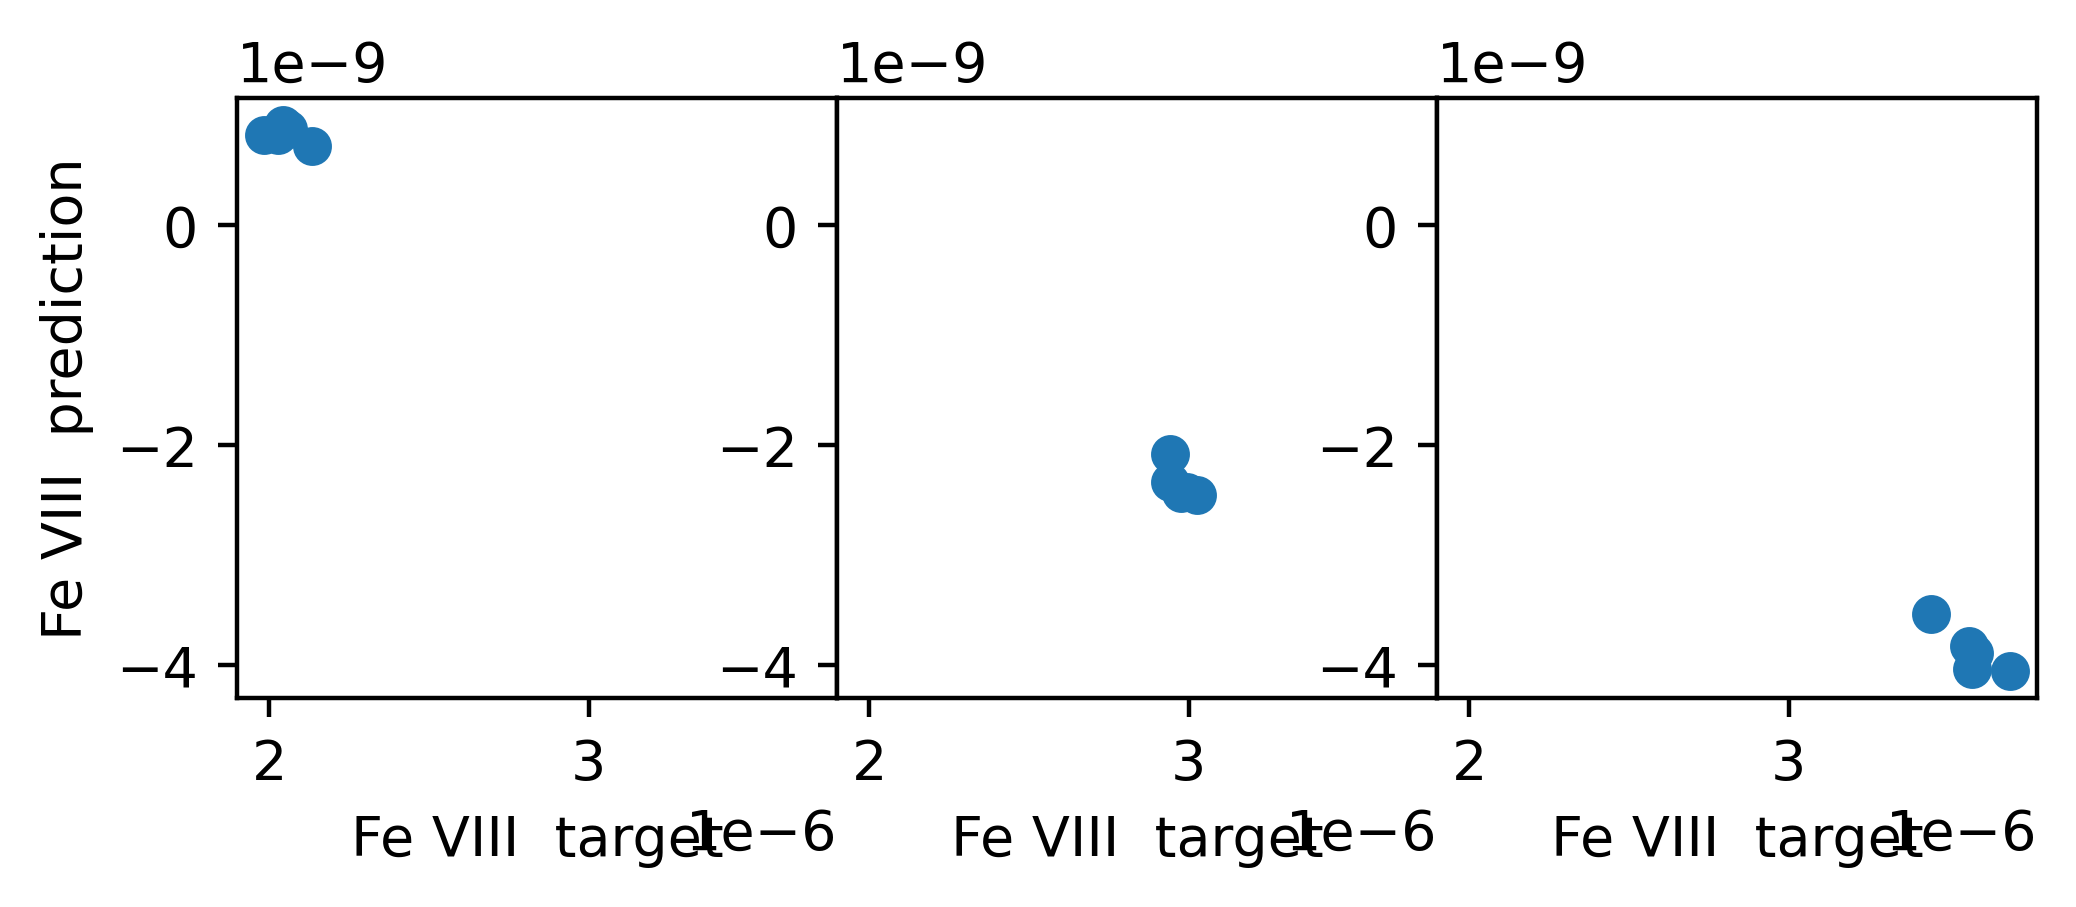

In [29]:
line = 1

name = eve['metadata']['name'][line]

dpi = 400
pxx = 600   # Horizontal size of each panel
pxy = pxx   # Vertical size of each panel

nph = 1     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])
ax1.scatter(np.array(train_output['data'])[:,line], np.array(train_output['prediction'])[:,line])
ax1.set_xlabel(name + ' target')
ax1.set_ylabel(name + ' prediction')

ax2 = fig.add_axes([ppadh+ppxx, ppadv, ppxx, ppxy], sharex=ax1, sharey=ax1)
ax2.scatter(np.array(val_output['data'])[:, line], np.array(val_output['prediction'])[:, line])
ax2.set_xlabel(name + ' target')
# ax2.set_ylabel(name + ' prediction')

ax3 = fig.add_axes([ppadh+2*ppxx, ppadv, ppxx, ppxy], sharex=ax1, sharey=ax1)
ax3.scatter(np.array(test_output['data'])[:, line], np.array(test_output['prediction'])[:, line])
ax3.set_xlabel(name + ' target')
# ax1.set_ylabel(name + ' prediction')

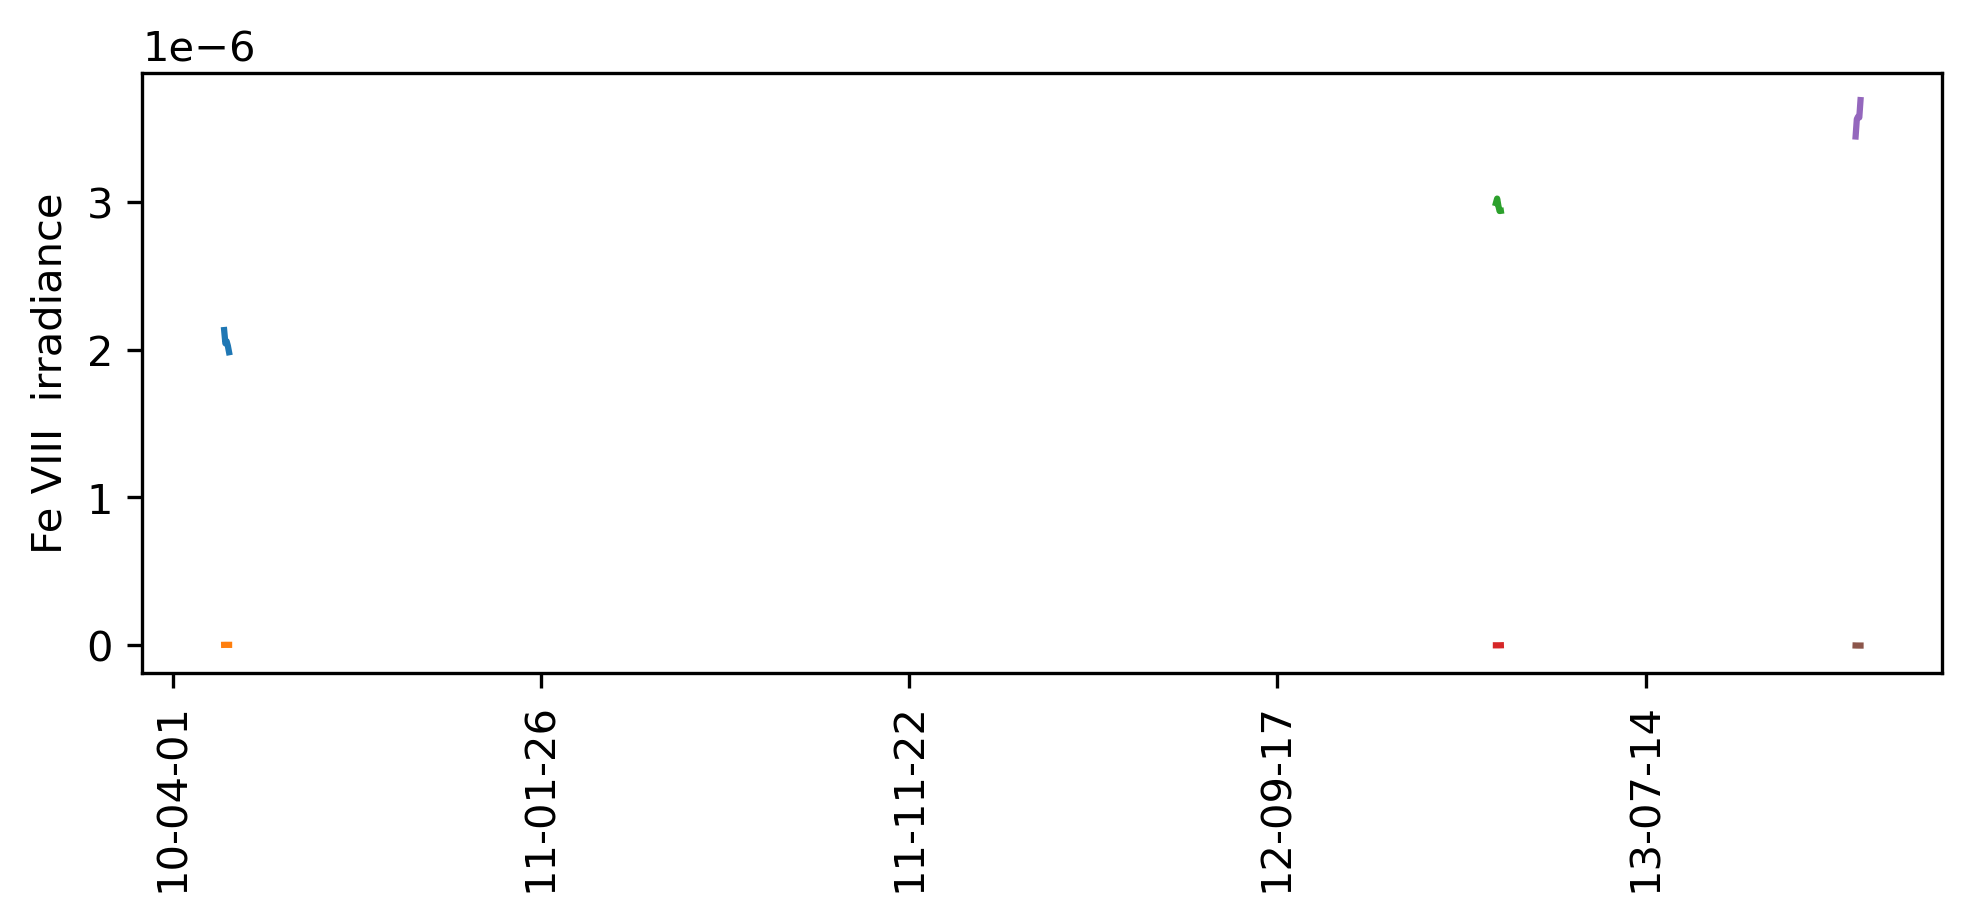

In [57]:
line = 1

name = eve['metadata']['name'][line]

dpi = 300
pxx = 1800   # Horizontal size of each panel
pxy = 600   # Vertical size of each panel

nph = 1     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)
fig.autofmt_xdate()

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])
ax1.plot(train_dates, np.array(train_output['data'])[:,line])
ax1.plot(train_dates, np.array(train_output['prediction'])[:,line])
# ax1.set_xlabel(name + ' target')
ax1.set_ylabel(name + ' irradiance')


ax1.plot(val_dates, np.array(val_output['data'])[:, line])
ax1.plot(val_dates, np.array(val_output['prediction'])[:,line])

ax1.plot(test_dates, np.array(test_output['data'])[:,line])
ax1.plot(test_dates, np.array(test_output['prediction'])[:,line])

myFmt = DateFormatter("%y-%m-%d")
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='x', labelrotation=90)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))



DatetimeIndex(['2010-05-13 00:00:12', '2010-05-14 00:00:12',
               '2010-05-15 00:00:12', '2010-05-16 00:00:13',
               '2010-05-17 00:00:13'],
              dtype='datetime64[ns]', freq=None)